# __Análise de componentes principais - PCA__

Nessa parte do trabalho, iremos utilizar o algoritmo de análise de componentes principais sobre o banco de dados, em busca de identificar os atributos que explicam a maior parte da variância dos dados. O método de análise de dados via PCA é particularmente útil quando variáveis no dataset são altamente correlacionadas, de forma que haja uma redundância de dados. Isso acontece no dataframe: as colunas de danceability e livenesse e tempo são intrisicamente relacionadas, por exemplo. Assim, aqui o PCA será usado como tentativa de reduzir o número de variáveis na análise de dados.

#### __Referências:__  
Videoaulas de PCA do professor Fabrício Muirai, da disciplina de Álgebra Linear Computacional:
https://www.youtube.com/watch?v=hlaLh-chsyE
https://www.youtube.com/watch?v=qqo_4p3vBr8&t=1016s

Aula da professora Cibele Russo, da USP: https://www.youtube.com/watch?v=u8th43VOyCw





In [75]:
#importando bibliotecas
import numpy as np
import pandas as pd

import math

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [76]:
#importando a base de dados
df = pd.read_csv('../data/numeric_columns.csv')

#removendo algumas colunas
del df['duration']
del df['mode']

#colocando a coluna de popularidade no final da tabela
new_cols = [col for col in df.columns if col != 'popularity'] + ['popularity']
df = df[new_cols]

df.head()

,track_id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_mins,release_year,popularity
0,6kVuF2PYLuvl9T85XjNbaO,0.597,0.800,1,-5.423,0.3120,0.0461,0.000000,0.1800,0.565,155.932,5.036433,2011,28
1,1RGIjMFMgJxkZHMDXVYzOJ,0.832,0.391,8,-8.504,0.0628,0.0564,0.000000,0.2240,0.436,104.961,3.980000,2007,75
2,1dIWPXMX4kRHj6Dt2DStUQ,0.571,0.767,2,-5.160,0.2870,0.3360,0.000000,0.0809,0.605,93.421,2.694733,2020,76
3,4QVS8YCpK71R4FsxSMCjhP,0.548,0.839,6,-2.371,0.0644,0.1350,0.000000,0.1020,0.314,98.932,3.638250,2018,72
4,7BoobGhD4x5K96Me0hqC8Q,0.855,0.463,3,-7.454,0.0367,0.2170,0.000018,0.3470,0.866,102.931,2.046200,2021,89


As variáveis que serão analisada são: dancabilidade, enegia, tom, altura, speechiness, acusticidade, instrumentalidade, liveness, valência, tempo, duração em minutos e ano de lançamento.

In [77]:
#tranformando o df em matrix
db_matrix = np.matrix(df.iloc[:, 1:13])
db_matrix

matrix([[5.97000000e-01, 8.00000000e-01, 1.00000000e+00, ...,
         1.55932000e+02, 5.03643333e+00, 2.01100000e+03],
        [8.32000000e-01, 3.91000000e-01, 8.00000000e+00, ...,
         1.04961000e+02, 3.98000000e+00, 2.00700000e+03],
        [5.71000000e-01, 7.67000000e-01, 2.00000000e+00, ...,
         9.34210000e+01, 2.69473333e+00, 2.02000000e+03],
        ...,
        [7.70000000e-01, 8.82000000e-01, 8.00000000e+00, ...,
         9.99910000e+01, 3.72538333e+00, 2.01900000e+03],
        [5.64000000e-01, 7.14000000e-01, 7.00000000e+00, ...,
         1.75924000e+02, 3.40021667e+00, 2.01600000e+03],
        [7.91000000e-01, 7.33000000e-01, 9.00000000e+00, ...,
         1.59974000e+02, 2.93021667e+00, 2.02000000e+03]])

In [78]:
#normalizando os dados
from sklearn.preprocessing import StandardScaler

db_matrix = np.asarray(db_matrix)
matrix_norm = StandardScaler().fit_transform(db_matrix)

#agora a média de todas as colunas é praticamente zero
matrix_norm.mean(0)

array([ 5.50234136e-16,  6.82501958e-16, -7.23064090e-17,  7.05428380e-18,
       -1.26977108e-16,  1.41085676e-17, -4.23257028e-17,  1.05814257e-17,
        4.72637015e-16, -1.55194244e-16, -1.34031392e-16,  1.44612818e-14])

In [79]:
matrix_norm = np.asarray(matrix_norm)

In [80]:
#importando o módulo de PCA
from sklearn.decomposition import PCA

#primeiro, vamos observar todos componentes principais 
pca = PCA(n_components = 12)

In [81]:
#rodando o PCA
pca.fit(matrix_norm)

PCA(n_components=12)

In [82]:
#componentes obtidos
np.round(pca.explained_variance_ratio_,3)

array([0.19 , 0.139, 0.104, 0.089, 0.085, 0.082, 0.081, 0.065, 0.055,
       0.052, 0.039, 0.02 ])

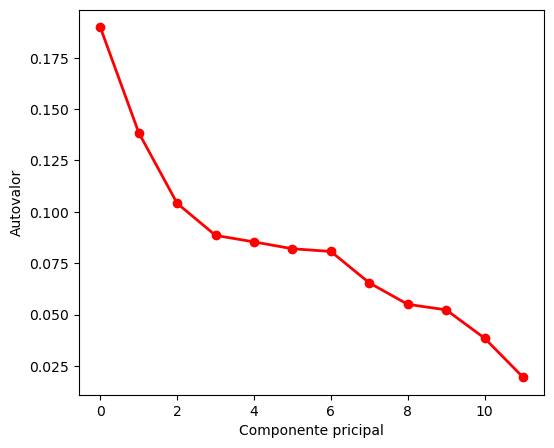

In [83]:
fig = plt.figure(figsize=(6, 5))

plt.plot(pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.xlabel('Componente pricipal')
plt.ylabel('Autovalor')

plt.show()

In [84]:
#verificando a soma cumulativa dos componentes para saber quanto componentes principais usar 
pca.explained_variance_ratio_.cumsum()

array([0.18985113, 0.32839216, 0.43253127, 0.5210731 , 0.60644854,
       0.68848616, 0.76921014, 0.83465471, 0.88965126, 0.94195586,
       0.98048133, 1.        ])

A partir desse resultado, concluímos que pelo menos 5 componentes principais devem ser usadas para explicar cerca de 60% da variabilidade dos dados.

In [85]:
#rodando agora o pca para 5 componentes
pca = PCA(n_components = 5)
pca.fit(matrix_norm)
pca.components_

array([[-0.17947597, -0.57367972, -0.06178351, -0.52271817,  0.03281353,
         0.43788878,  0.06258004, -0.1041846 , -0.36190369, -0.14665617,
         0.00442902,  0.03914765],
       [-0.4655848 ,  0.15125247,  0.03107577,  0.1377334 , -0.52139693,
         0.12336445,  0.08986645,  0.12483795, -0.11418474, -0.12918677,
         0.5048772 , -0.3808607 ],
       [ 0.43622381, -0.16861413,  0.05342   , -0.18667439,  0.08292539,
         0.06831315, -0.14125511, -0.25612042,  0.48074129, -0.20259123,
         0.32253916, -0.51990013],
       [ 0.23890692,  0.08319995,  0.23983245,  0.0428687 , -0.3572493 ,
         0.09579674,  0.61337221, -0.20134142,  0.10461123, -0.46783313,
        -0.21598823,  0.21590215],
       [-0.09500965, -0.02177438,  0.63151609, -0.17373337,  0.15023124,
        -0.00285068,  0.39881456, -0.03650005,  0.06155999,  0.5914551 ,
         0.08735188, -0.13153405]])

In [86]:
PCA1 = pca.transform(matrix_norm)[:, 0]
PCA2 = pca.transform(matrix_norm)[:, 1]
PCA3 = pca.transform(matrix_norm)[:, 2]
PCA4 = pca.transform(matrix_norm)[:, 3]
PCA5 = pca.transform(matrix_norm)[:, 4]

#inserindo pca nas tabelas
df['PCA1'] = PCA1
df['PCA2'] = PCA2
df['PCA3'] = PCA3
df['PCA4'] = PCA2
df['PCA5'] = PCA3

In [88]:
def f(x):
    return round(x/33)

#mudando os valores da coluna de popularidade para melhor visualização do resultado do PCA
df['popularity'] = df['popularity'].apply(f)

In [89]:
import plotly.express as px

#visualizando resultados

components = pca.fit_transform(matrix_norm)
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(3),
    color=df["popularity"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

__Resultado:__ Não é possível enxergar os ranges de popularidede forma distinta. Assim, podemos concluir que a representação comprimida dos dados via PCA não tem qualidade suficiente para ser um classificador de popularidade. 